# Machine Learning USTEP 2021
### This python notebook uses a simple k-means algorithm
### run the cells below DO NOT MODIFY THE CODE OR THE PROGRAM WON'T WORK 
## link to slides, the last slide has other machine learning models to explore!
## https://drive.google.com/file/d/1-dACzzP4MhmEh_M7r9xoD54ypiGeggYc/view?usp=sharing

In [1]:
#@title Load necessary libraries, don't edit this cell! { vertical-output: true, display-mode: "form" }
%%capture
!pip install numpy
!pip install matplotlib





In [2]:
#@title Load the dataset: Notify instructor if you have issues :D  { vertical-output: true, display-mode: "form" }
try:
  import numpy as np
  import matplotlib.pyplot as plt
  import random 
except ModuleNotFoundError:
  print("imports not found, run the top cell again")
try: 
  def dataset_1():
    random.seed(20)
    red_groupX = []
    red_groupY, red_groupZ = [], []
    blue_groupX, blue_groupY, blue_groupZ= [], [],[]
    for i in range(0, 50):
      numX = random.randrange(20, 40)
      numY = random.randrange(20, 40)
      red_groupX.append(numX)
      red_groupY.append(numY)
      red_groupZ.append(1)
      numX = random.randrange(1, 19)
      numY = random.randrange(1, 19)
      red_groupX.append(numX)
      red_groupY.append(numY)
      red_groupZ.append(0)
    return [red_groupX, red_groupY]

  def dataset_2():
    random.seed(20)
    red_groupX = []
    red_groupY, red_groupZ = [], []
    blue_groupX, blue_groupY, blue_groupZ= [], [],[]
    for i in range(0, 50):
      numX = random.uniform(23, 39,)
      numY = random.uniform(25, 41)
      red_groupX.append(numX)
      red_groupY.append(numY)
      numX = random.uniform(1, 5)
      numY = random.uniform(2, 6)
      red_groupX.append(numX)
      red_groupY.append(numY)
      numX = random.uniform(10, 17)
      numY = random.uniform(10, 14)
      red_groupX.append(numX)
      red_groupY.append(numY)
      ##noise data
    for i in range(0, 20):
      numX = random.uniform(0, 40)
      numY = random.uniform(0, 40)
      red_groupX.append(numX)
      red_groupY.append(numY)

    return [red_groupX, red_groupY]
  datasets = [np.column_stack(dataset_1()),np.column_stack(dataset_2()), np.column_stack(dataset_1())]
  print("data sets loaded!")
except ModuleNotFoundError:
  print(" Datasets did not load")

data sets loaded!


In [3]:
#@title K-means algorithmn (don't edit this code or your algorithmn might not work!) { display-mode: "form" }
class k_means():
  def __init__(self, data, k_points, iterations, learning_rate,r_seed):
    self.data = data
    self.learning_rate = learning_rate
    self.k_points = k_points
    self.iterations = iterations
    self.error = 0
    self.error_list = []
    self.current_guess = []
    self.intial_guess = []
    self.r_seed = r_seed
  def make_guess( self):
      ## return random guess of points 
    random.seed(self.r_seed)  
    for i in range(0,self.k_points):
      y = random.randint(0, max(self.data[:,1])-3)
      x = random.randint(0, max(self.data[:,1])-3)
      self.intial_guess.append([x,y])

    x = self.intial_guess
    self.current_guess = x
    return self.intial_guess

  def compute_error(self):
    #for each point of data decide closest point
    k_clusters_error = [0]*len(self.current_guess)
    k_membership = [0] *len(self.current_guess)
    for i in self.data:
      distance = []
      for j in self.current_guess:
        d = ((np.array(i)).ravel()-(np.array(j)).ravel())
        d = np.dot(d, d)
        distance.append(d)
        
      self.error+= min(distance)
    self.error = self.error/len(self.data)
    return(self.error)


  def update_guess(self):
    for i in range(0, len(self.current_guess)):
      self.current_guess[i] = self.current_guess[i] - (self.learning_rate*self.error)
    return self.current_guess

  def make_graph(self):
    data1 = np.array(self.data)
    data2 = np.array(self.data)
    predictions1 = np.array(self.intial_guess)
    predictions2 = np.array(self.current_guess)

    fig, axs = plt.subplots(2)
    fig.suptitle('Top plot is intial guess, bottom plot is final prediction')
    axs[0].scatter(data1[:,0], data1[:,1], c = "blue", marker = ".")
    axs[0].scatter(predictions1[:,0], predictions1[:,1], c = "red", marker="*")
    axs[0].set_xlim(min(data1[:,0])-10, max(data1[:,0])+10)
    axs[0].set_ylim(min(data1[:,1])-10, max(data1[:,1])+10)
    
    axs[1].scatter(data2[:,0], data2[:,1], c = "blue", marker = ".")
    axs[1].scatter(predictions2[:,0], predictions2[:,1], c = "red", marker="*")
    axs[1].set_xlim(min(data1[:,0])-10, max(data1[:,0]))
    axs[1].set_ylim(min(data1[:,1])-10, max(data1[:,1]))
    return plt.show()

  def show_loss(self):
    x = np.linspace(0, len(self.error_list), len(self.error_list))
    plt.scatter(x, self.error_list)
    plt.title("loss vs. iteration")
    plt.show()
  def make_prediction(model_points, values):
    #returns the prediction of of the points. 
    return 1

  def fit_model(self):
    e = 0
    self.current_guess = self.make_guess()
    for i in range(self.iterations):
      m_error = self.compute_error()
      self.current_guess = self.update_guess()
      self.error_list.append(m_error)
    self.show_loss()
    self.make_graph()
    
    return

Enter learning rate (input should be a decimal such as 0.001) 0.01
Enter number of iterations (input should be an integer such as 100) 100
Enter number of cluster (input should be an integer such as 2) 2
Enter random seed for reproducable results  2
Enter data set number (1, 2, or 3)  2


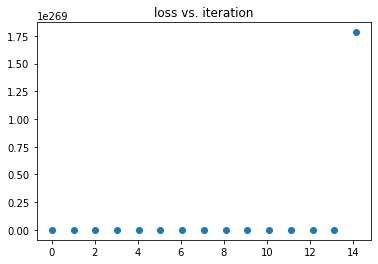

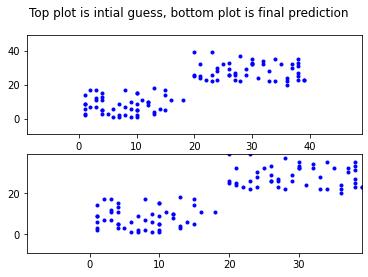

In [4]:
#@title Run this cell to run your algorithm { vertical-output: true, display-mode: "form" }
#inputs
try:
  learning_rate = float(input("Enter learning rate (input should be a decimal such as 0.001) "))
  number_of_repeats = int(input("Enter number of iterations (input should be an integer such as 100) "))
  number_of_points = int(input("Enter number of cluster (input should be an integer such as 2) "))
  random_seed = int(input("Enter random seed for reproducable results  "))
  data_set_num = int(input("Enter data set number (1, 2, or 3)  "))//3
  
  datasets = [np.column_stack(dataset_1()),np.column_stack(dataset_2()), np.column_stack(dataset_1())]
  x =datasets[data_set_num]
# make the model
  model = k_means(np.column_stack(dataset_1()),number_of_points, number_of_repeats, learning_rate, random_seed)
  ## fit the model will print out graphs as well
  model.fit_model()
#throw exception if invalid input
except ValueError:
  print(" invalid input, rerun cell and make sure you your input are numbers!")



